# **NEWTON'S METHOD FOR AUTOMATIC DIFFERENTIATION**

The Newton's Method is an iterative algorithm used to find the roots of nonlinear functions, which are the values of $x$ such that $f(x)=0$.

The method is based on approximating the function $f(x)$ using its tangent line. The tangent to $f(x)$ at a generic point $x_0$ is given by:

$$
y = f(x_0) + f'(x_0)(x - x_0)
$$

In order to find the point in which the tangent intercepts the $x$-axis, we set $y = 0$ and we obtain the value of the root of the function, given by:

$$
x^* = x_0 - \frac{f(x_0)}{f'(x_0)}
$$

The iterative process starts with an initial estimate $x_0$, and the idea behind the algorithm is to update the estimate with the zeros of the linear approximations of the original function $f(x^*)$ until it reaches a convergence.

This means that we can rewrite the previous formula to describe the iterations of the Newton's method as:

$$
x_{n+1}=x_n - \frac{f(x_n)}{f'(x_n)}
$$

And the algorithm iterates until it reaches convergence, which occurs when the difference between two successive iterations is smaller than a predifined tolerance:

$$
|x_{k+1}-x_k|<tolerance
$$

The algorithm can also be explained by a geometrical point of view, as we can see in the following picture:

![testo del link](https://upload.wikimedia.org/wikipedia/commons/thumb/8/8c/Newton_iteration.svg/2560px-Newton_iteration.svg.png)

Newton's method generalizes naturally to multiple dimensions, both with more variables (inputs) and more functions (outputs), as in the case of a vectorial function.

For example, if we want to find the zeros of a vectorial function:

$$
f(\mathbf{x}) = \begin{pmatrix}
f_1(x_1, x_2, ...) \\
f_2(x_1, x_2, ...) \\
...
\end{pmatrix} = 0
$$

The iterative formula uses the Jacobian matrix instead of just the single first derivative. So it becomes:

$$
x_{k+1}= x_k - [J(x_k)]^{-1} f(x_k)
$$

where $J(x_k)$ is the Jacobian matrix, containing the partial derivatives of $f$.

Newton's method is a useful technique, powered a quadratic convergence near the root, meaning that the iterative solution converges very quickly when the initial guess is close to the root. But it can also have an high computational cost because, when dealing with problems of higher dimensions, it has to compute for each iteration the Jacobian matrix and its inverse.

In order to mitigate this problem, automatic differentiation can be implemented to mitigate the computational cost of the algorithm by offering an efficient way to compute derivatives (or Jacobian matrices).



# **Automatic Differentiation**

From the need to compute partial derivatives (gradients) efficiently, Automatic Differentiation is the most widely used technique in practice, and it works by saving the partial results of the execution of the program to be differentiated, and cunningly applying the chain rule.

Automatic Differentiation is a general technique of numerical analysis, and it turns out that backpropagation is a special case of this technique. We can think of Automatic Differentiation as a set of techniques to numerically (in contrast to symbolically) evaluate the exact (up to machine precision) gradient of a function by working with intermediate variables and applying the chain rule.

Automatic Differentiation applies a series of elementary arithmetic operations, e.g., addition and multiplication and elementary functions, e.g., sin, cos, exp, log.

By applying the chain rule to these operations, the gradient of quite complicated functions can be computed automatically. Automatic Differentiation applies to general computer programs and has forward and reverse modes.
This simple graph representing the data flow from inputs x to outputs y via some intermediate variables a, b:

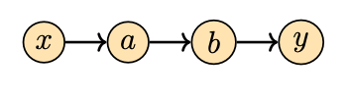

If we were to compute the derivative $dy/dx$, we would apply the chain rule and obtain:

$$
\\
\frac{dy}{dx}= \frac{dy}{db} \frac{db}{da} \frac{da}{dx}
\\
$$

Intuitively, forward and reverse mode differ in the order of multiplication. Let's look at the characteristics and differences:

1) *Forward mode*

$$
\frac{dy}{dx}= \frac{dy}{db} \left( \frac{db}{da} \frac{da}{dx} \right)
\\
$$

The equation represents the forward mode, where the gradients flow with the data from left to right through the graph. Forward mode is most efficient when you have few inputs (independent variables) and many output, plus each step computes a directional derivative; thus, it is useful for applications such as nonlinear optimization with few parameters.
is a limited technique, however, because it becomes inefficient if the number of inputs grows, since many independent steps are required to compute all derivatives.

2) *Reverse mode*

$$
\frac{dy}{dx}= \left( \frac{dy}{db} \frac{db}{da} \right) \frac{da}{dx}
\\
$$

The equation describes the reverse mode because gradients are propagated backward through the graph reverse to the data flow. Reverse mode is most efficient for functions with many inputs (model parameters) and few outputs (e.g., a scalar loss function). It computes all gradients with respect to inputs in a single backward pass. However, it has limitations because it requires more memory space to save the computational graph and intermediate operations.
The reverse mode automatic differentiation is backpropagation and in the context of neural networks, where the input dimensionality is often much higher than the dimensionality of the labels, the reverse mode is computationally significantly cheaper than the forward mode, because reverse mode automatic differentiation works by saving the partial results of the execution of the program to be differentiated, and cunningly applying the chain rule of “reverse-mode” derivation from the original execution to compute gradients.

In machine learning, training a model means finding the parameters (e.g., weights W and the biases b) that minimize a loss function L (W,b), which measures the error of the model with respect to the data. *Backpropagation* makes it possible to calculate the gradient of the cost function with respect to network weights W and biases b. This computation is done through the application of the chain rule, which allows the error to propagate back through the network, starting from the output to the initial layers. The resulting gradients provide the information needed to update the weights and minimize the error.

# **Example**

Consider the function
$$
f(x, y) = \begin{pmatrix}
x^2 y^3-1 \\
\end{pmatrix}
$$

If we were to implement a function f on a computer, we would be able to save some computation by using intermediate variables:
$$
\
a = x^2
\
$$

$$
\
b = y^3
\
$$

$$
\
c = a*b
\
$$

$$
\
d = c-1
\
$$

This is the same kind of thinking process that occurs when applying the chain rule. The corresponding computation graph shows the flow of data and computations required to obtain the function value f.
The set of equations that include intermediate variables can be thought of as a computation graph, a representation that is widely used in implementations of neural network software libraries. We can directly compute the derivatives of the intermediate variables with respect to their corresponding inputs by recalling the definition of the derivative of elementary functions. We obtain the following:

$$
\
\frac{da}{dx} = 2x
\
$$

$$
\
\frac{db}{dy} = 3y^3
\
$$

$$
\
\frac{dc}{da} = y^3
\
$$

$$
\
\frac{dc}{db} = x^2
\
$$

$$
\
\frac{dd}{dc} = 1
\
$$

By looking at the computation graph, we can compute ∂f/∂x and ∂f/∂y by working backward from the output and obtain

$$
\frac{dd}{dx}= \frac{ad}{dc} \frac{dc}{da} \frac{da}{dx} \
\\
$$

$$
\frac{dd}{dy}= \frac{ad}{dc} \frac{dc}{db} \frac{db}{dy} \
\\
$$


Note that we implicitly applied the chain rule to obtain ∂f/∂x and ∂f/∂y. By substituting the results of the derivatives of the elementary functions, we get

$$
\
\frac{da}{dx} = 1*2x*y^3=2xy^3
\
$$

$$
\
\frac{da}{dy} = 1*x^2*3y^2=3x^2y^2
\
$$

In [1]:
import autograd.numpy as np
import autograd as ag


def zerovett(f,x1,it = None) : # Function to compute the root of a vectorial function
    if it == None :
        it = 0

    it = it + 1
    x1 = np.array(x1, dtype = float) # It is used to pass x1 as both a tuple and an array
    J_auto = ag.jacobian(f) # Jacobian of f evaluated at the point x1
    J = J_auto(x1)
    if np.linalg.det(J) == 0 or it == 1000 :
        if np.linalg.det(J) == 0 :
            print('Jacobian Matrix singular at step', it, ':\n The problem is poorly stated')

        else :
            print('Maximum number of iterations reached:\n Inaccurate solution')

        x2 = x1

    else :
        A = np.linalg.inv(J) #A = inv(J)
        x2 = x1 - np.dot(A,f(x1)) # Compute new iteration
        diff = x2 - x1 # Comparison between steps:
        m = np.linalg.norm(diff)
        tol = 10 ** -10
        if (m < tol and np.linalg.norm(f(x2)) < tol) :
            print('Solution: ',x2)
            print('found in',it,'steps')
            print('f(x2) =', f(x2))

        else :
            x2 = zerovett(f, x2, it)

    return(x2)

**Test 1**

With a starting point of $[ 1, 1 ]$, find the root of the function:

$$
f(x, y) = \begin{pmatrix}
x^2 y^3-1 \\
x^3-xy^3-4
\end{pmatrix}
$$

In [2]:
print('Test 1')

def f(x):
     y = np.array([x[0]**2 * x[1]**3-1, x[0]**3-x[0]*x[1]**3-4])
     return(y)
# #a = np.array([1,1], dtype=float)
a = np.array([1.,1.])
# #a = a.astype(float)
z = zerovett(f,a)

print('f(x,y)=(x^2 * y^3 -1 , x^3 - xy^3 -4)\nInitial point: x1 =',a)
print('Zero found in: [x, y] =',z)
print('Check: f(x, y) =',f(z))

Test 1
Solution:  [1.66325194 0.71235199]
found in 8 steps
f(x2) = [2.22044605e-16 8.88178420e-16]
f(x,y)=(x^2 * y^3 -1 , x^3 - xy^3 -4)
Initial point: x1 = [1. 1.]
Zero found in: [x, y] = [1.66325194 0.71235199]
Check: f(x, y) = [2.22044605e-16 8.88178420e-16]


**Test 2**

With a starting point of $[ 1, 0 ]$, find the root of the function:

$$
f(x, y) = \begin{pmatrix}
x^2 + 9 \\
y
\end{pmatrix}
$$

In [15]:
################## TEST 2 (NB questa non ha zeri, deve dire 'Soluzione non accurata')
print('Test 2')
def f(x):
    y = np.array([x[0]**2 + 9, x[1]])
    return(y)
a = (1.,0.)
#a = np.array(a)
z = zerovett(f,a)
print('f(x,y)=(x^2 + 9 , y)\nInitial point: x1 =',a)
print('Zero found: [x, y] =',z)
print('Check: f(x, y) =',f(z))

Test 2


RecursionError: maximum recursion depth exceeded while calling a Python object

**Test 3**

With a starting point of $[ 10, 51 ]$, find the root of the function:

$$
f(x, y) = \begin{pmatrix}
x^2 - 9 \\
y
\end{pmatrix}
$$

In [6]:
################## TEST 3 (funzione del test 2 modificata in modo che abbia degli zeri)
print('Test 3')
f = lambda x: np.array([x[0]**2 - 9, x[1]], dtype = float)
a = np.array([10.,51.])
z = zerovett(f,a)
print('f(x,y)=(x^2 - 9, y)\nInitial point: x1 =',a)
print('Zero found: [x, y] =',z)
print('Check: f(x, y) =',f(z))

Test 3
Solution:  [3. 0.]
found in 7 steps
f(x2) = [0. 0.]
f(x,y)=(x^2 - 9, y)
Initial point: x1 = [10. 51.]
Zero found: [x, y] = [3. 0.]
Check: f(x, y) = [0. 0.]


**Test 4**

With a starting point of $[-3, 5, -1]$, find the root of the function:

$$
f(x, y, z) = \begin{pmatrix}
x^2 - 9 + z^3 + 1 \\
y \\
z + 1
\end{pmatrix}
$$

In [7]:
################## TEST 4 (funzione del test 3 modificata in 3 variabili)
print('Test 4')
f = lambda x: np.array([x[0]**2 - 9 + x[2]**3 +1, x[1], x[2]+1], dtype = float)
a = np.array([-3.,5.,-1.])
z = zerovett(f,a)
print('f(x,y)=(x^2 - 9 + z^3 + 1 , y , z + 1)\nInitial point: x1 =',a)
print('Zero found: [x, y, z] =',z)
print('Check: f(x, y, z) =',f(z))

Test 4
Solution:  [-3.  0. -1.]
found in 2 steps
f(x2) = [0. 0. 0.]
f(x,y)=(x^2 - 9 + z^3 + 1 , y , z + 1)
Initial point: x1 = [-3.  5. -1.]
Zero found: [x, y, z] = [-3.  0. -1.]
Check: f(x, y, z) = [0. 0. 0.]


**Test 5**

With a starting point of $[3, 5, 1]$, find the root of the function:

$$
f(x) = \begin{pmatrix}
x^2 - 9 + z^3 + 1 \\
y \\
z + 1
\end{pmatrix}
$$

In [8]:
################## TEST 5 (funzione del test 4 con diverso punto iniziale, non dà la soluzione)
print('Test 5')
f = lambda x: np.array([x[0]**2 - 9 + x[2]**3 +1, x[1], x[2]+1], dtype = float)
#a=np.array([3,5,1], dtype=float)
a = (3,5,1)
z = zerovett(f,a)
print('f(x,y)=(x^2 - 9 + z^3 + 1 , y , z + 1)\nInitial point: x1 =',a)
print('Zero found: [x, y, z] =',z)
print('Check: f(x, y, z) =',f(z))

Test 5
Solution:  [ 3.  0. -1.]
found in 6 steps
f(x2) = [0. 0. 0.]
f(x,y)=(x^2 - 9 + z^3 + 1 , y , z + 1)
Initial point: x1 = (3, 5, 1)
Zero found: [x, y, z] = [ 3.  0. -1.]
Check: f(x, y, z) = [0. 0. 0.]


# **AN ITALIAN EXAMPLE**

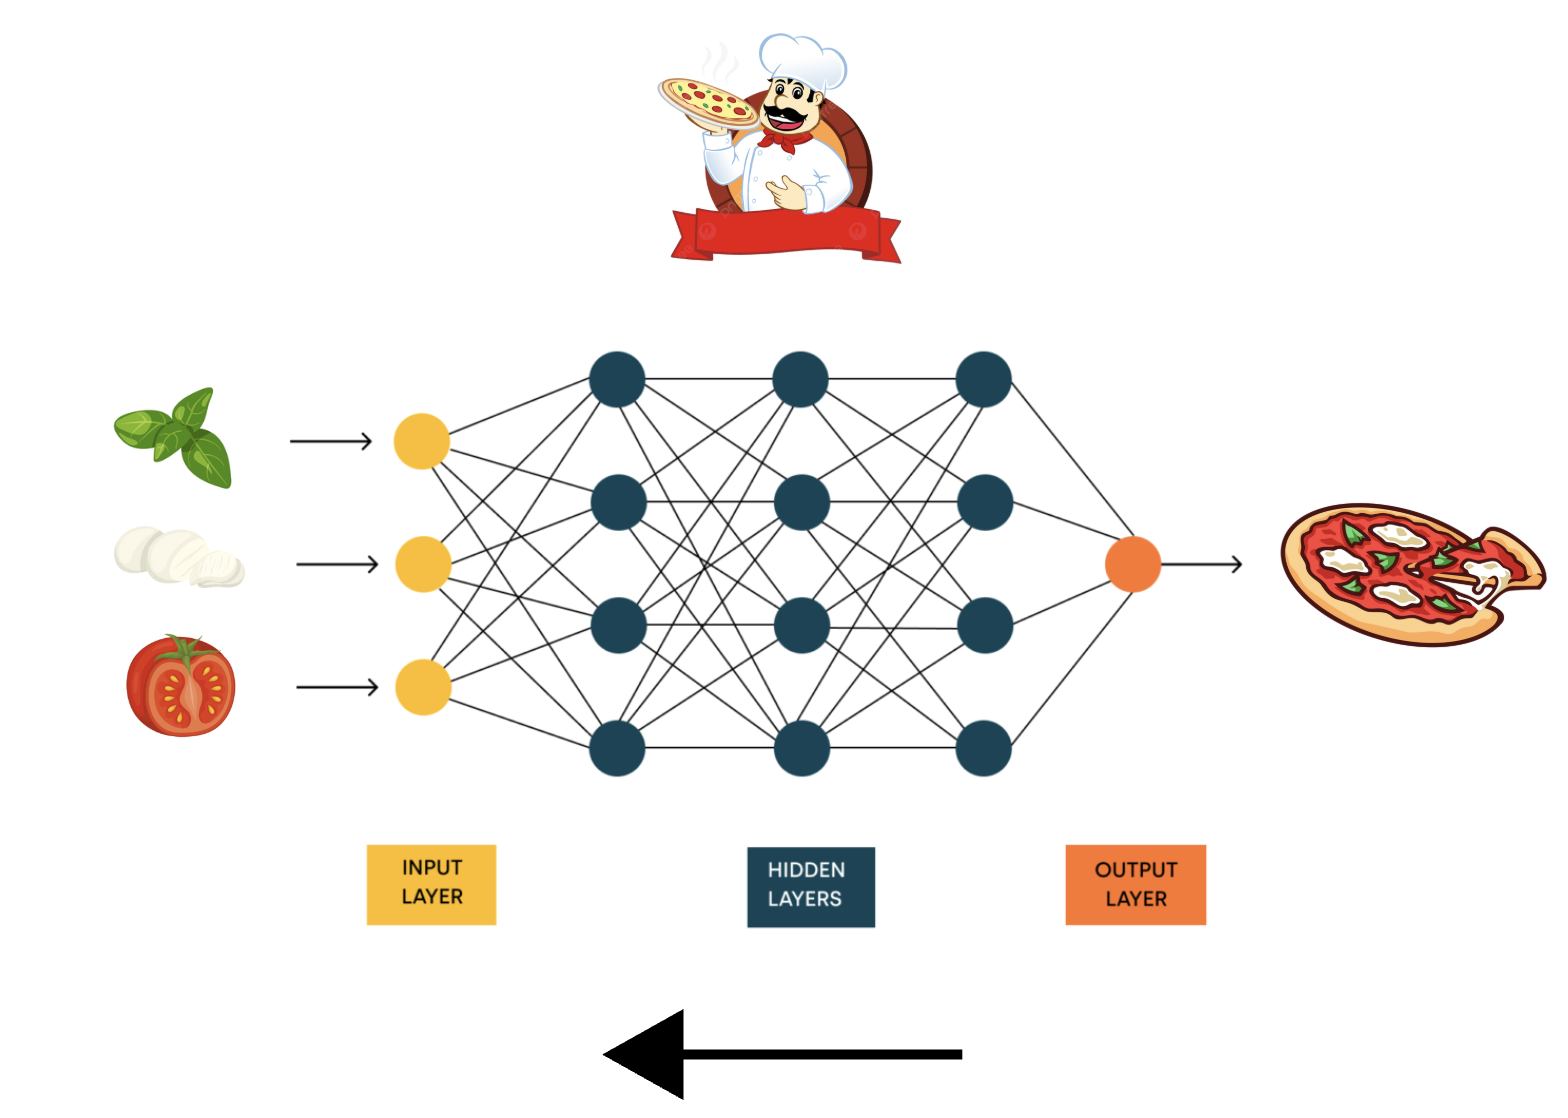

Here we can see an example of *Automatic Differentiation* applied to the backpropagation in neural newtorks.

Imagine running a pizza shop where your goal is to create the perfect pizza for your customers. You have a team of chefs, each responsible for a specific task. Your customers give feedback on how much they enjoyed the pizza, and you, as the manager, use that feedback to guide your chefs on how to improve.

Here’s how backpropagation fits into this scenario:

* Making the Pizza (Forward Pass): the chefs work step-by-step, each adding something to the pizza. This is like the forward pass in a neural network, where data flows through each layer, transforming as it goes.

* Customer Feedback (Error Calculation): once the pizza is served, the customer gives feedback, that represents the error or loss that tells you how far you are from the perfect pizza.

* Assigning Responsibility (Backward Pass): as the manager, you need to figure out how much each chef’s actions contributed to the problem. Backpropagation does the same in a neural network: it uses the chain rule to compute how much each layer (or parameter) contributed to the overall error.

* Adjusting the Recipe (Parameter Update): once you know who’s responsible, you guide your chefs on what to fix. Similarly, in neural networks, the optimizer adjusts the weights and biases based on the computed gradients to reduce the error in the next iteration.

* In this case the Automatic Differentiation keeps track of every chef’s actions and calculates exactly how their work impacts the final pizza. This is what it does in neural networks: it automates the process of calculating gradients, making the entire process faster.

By iterating this process (making pizzas, getting feedback, and adjusting the recipe) your team gradually gets closer to creating the perfect pizza. Similarly, backpropagation helps a neural network learn by continuously adjusting its parameters based on the error until it can make accurate predictions or decisions, minimizing the loss function.